In [ ]:
import sys
from tfpcbpggsz.amp.amplitude import Amplitude

# Create an instance to check if the issue is resolved
#Call the amplitude
Amplitude_D = Amplitude(model='evtgen')
Amplitude_D.init()


D0ToKSpipi2018 (evtgen) (July 17 2025) ==> Initialization !


In [4]:
Amplitude_D_ampgen = Amplitude(model='ampgen')
Amplitude_D_ampgen.init()

D0ToKSpipi2018 (ampgen version) (July 17 2025) ==> Initialization !


In [5]:

import math
def is_valid_point(x):
    PI_mass = 0.13957018
    K0_mass = 0.497614
    mD0 = 1.86484

    msquared01 = x[0]  # Kpi(RS)
    msquared02 = x[1]  # Kpi(WS)
    msquared12 = mD0 * mD0 + K0_mass * K0_mass + 2 * PI_mass * PI_mass - msquared01 - msquared02

    local_ma = K0_mass
    local_mb = PI_mass
    local_mc = PI_mass

    local_xmin = (local_ma + local_mb) ** 2
    local_xmax = (mD0 - local_mc) ** 2

    # Find energy of b(c) in ab frame
    ebab = (x[0] - local_ma ** 2 + local_mb ** 2) / (2.0 * math.sqrt(x[0]))
    ecab = (mD0 ** 2 - x[0] - local_mc ** 2) / (2.0 * math.sqrt(x[0]))

    if ebab < local_mb or ecab < local_mc: 
        print('point one')
        return False


    yhi = (ebab + ecab) ** 2 - (math.sqrt(ebab ** 2 - local_mb ** 2) - math.sqrt(ecab ** 2 - local_mc ** 2)) * \
          (math.sqrt(ebab ** 2 - local_mb ** 2) - math.sqrt(ecab ** 2 - local_mc ** 2))
    ylo = (ebab + ecab) ** 2 - (math.sqrt(ebab ** 2 - local_mb ** 2) + math.sqrt(ecab ** 2 - local_mc ** 2)) * \
          (math.sqrt(ebab ** 2 - local_mb ** 2) + math.sqrt(ecab ** 2 - local_mc ** 2))

    # Check if the point is within the Dalitz-plot phase space
    in_dal = local_xmin <= x[0] and x[0] <= local_xmax and ylo <= msquared12 and msquared12 <= yhi
    return in_dal

In [6]:
import uproot as up
import numpy as np

import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/gen_toy/'
f = up.open(int_path+'D_model_alt_swap_2.root:flavour__DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]], dtype=np.float64)
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]], dtype=np.float64)
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]], dtype=np.float64)

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



In [7]:
def get_mass(p1,p2):
    return ((p1[:,0]+p2[:,0])**2 - (p1[:,1]+p2[:,1])**2 - (p1[:,2]+p2[:,2])**2 - (p1[:,3]+p2[:,3])**2)


In [8]:

data = (p1, p2, p3)

In [9]:
amp, ampbar = Amplitude_D.amp(data), Amplitude_D.ampbar(data)
amp2, ampbar2 = Amplitude_D_ampgen.amp(data), Amplitude_D_ampgen.ampbar(data)

In [12]:
print(abs(amp[0])**2)
print(abs(ampbar[0])**2)

tf.Tensor(71.23795095913614, shape=(), dtype=float64)
tf.Tensor(71.8190970230895, shape=(), dtype=float64)


In [13]:
s12 = get_mass(p1, p2)
s13 = get_mass(p1, p3)

(array([0.43110218, 0.58004247, 0.6200355 , 0.65990076, 0.63462699,
        0.59858244, 0.59944344, 0.5722286 , 0.55112544, 0.54352055,
        0.60793224, 0.70271411, 0.94451069, 1.42766682, 1.94534226,
        1.4857347 , 1.111823  , 0.9153972 , 0.77266434, 0.654466  ,
        0.57222129, 0.49724099, 0.45112165, 0.4211633 , 0.39049368,
        0.38896919, 0.37301048, 0.39009579, 0.42334289, 0.46877613,
        0.48347057, 0.46260389, 0.43891632, 0.40380203, 0.36648866,
        0.33170774, 0.29894912, 0.27602763, 0.25974155, 0.24034125,
        0.22565696, 0.21338626, 0.20531899, 0.19646241, 0.18593546,
        0.17318152, 0.1649547 , 0.16697672, 0.15437524, 0.15046095,
        0.13904699, 0.13815156, 0.12360905, 0.11711308, 0.10441212,
        0.09488208, 0.08716636, 0.07427912, 0.06955464, 0.06499469,
        0.05879771, 0.0605443 , 0.05387402, 0.05441747, 0.04879301,
        0.04926748, 0.04973801, 0.05291287, 0.05479818, 0.05813999,
        0.06331497, 0.07060046, 0.07940581, 0.09

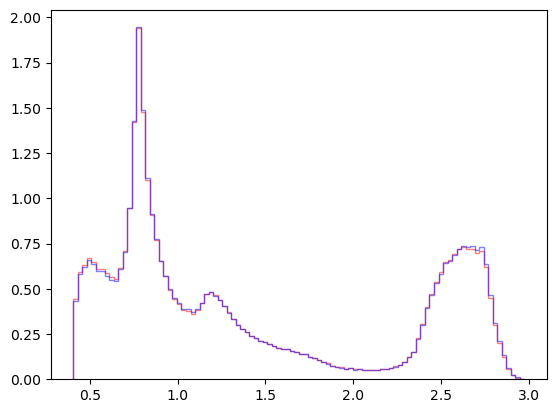

In [14]:
plt.hist(s12, weights=abs(amp2)**2, bins=100, alpha=0.5, label='amp', histtype='step', color='red', density=True)
plt.hist(s12, weights=abs(amp)**2, bins=100, alpha=0.5, label='amp', histtype='step', color='blue', density=True)

(array([4.06542103e-02, 6.04299367e-02, 1.00489506e-01, 1.36819375e-01,
        1.32815023e-01, 1.20458469e-01, 1.07251789e-01, 9.42862608e-02,
        8.22997414e-02, 7.16638947e-02, 6.61350446e-02, 5.63745533e-02,
        4.76052222e-02, 3.77952385e-02, 2.50811387e-02, 1.61224308e-02,
        1.65288285e-02, 2.02315551e-02, 2.29594169e-02, 2.56327057e-02,
        2.97640610e-02, 3.65791153e-02, 4.98998139e-02, 7.29468811e-02,
        1.20904298e-01, 2.35617222e-01, 4.58786070e-01, 9.35601914e-01,
        1.53277814e+00, 1.90624952e+00, 1.95593667e+00, 1.87218897e+00,
        1.71624712e+00, 1.54849772e+00, 1.38800188e+00, 1.21353921e+00,
        1.06838533e+00, 9.50986687e-01, 8.17970493e-01, 7.03002957e-01,
        6.08582515e-01, 5.19342632e-01, 4.41416756e-01, 3.78669796e-01,
        2.99735906e-01, 2.52495773e-01, 1.99157270e-01, 1.68691257e-01,
        1.28604245e-01, 9.91622651e-02, 7.46795496e-02, 6.01699400e-02,
        4.20718353e-02, 3.21711703e-02, 2.16756147e-02, 1.557471

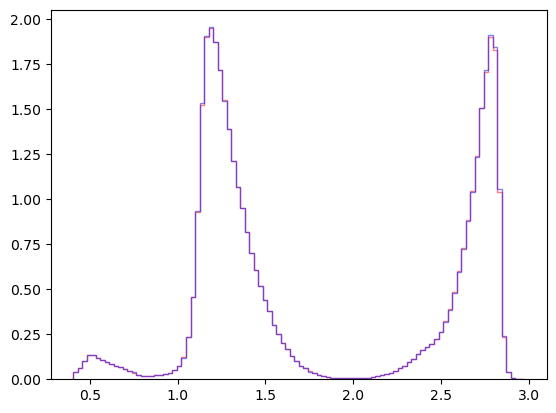

In [182]:
plt.hist(s12, weights=abs(ampbar2)**2, bins=100, alpha=0.5, label='amp', histtype='step', color='red', density=True)
plt.hist(s12, weights=abs(ampbar)**2, bins=100, alpha=0.5, label='amp', histtype='step', color='blue', density=True)

In [183]:
from tfpcbpggsz.generator.phasespace import gets23

In [184]:
s23 = gets23(s12, s13)

(array([6.25400916e-02, 2.15921110e-01, 4.25158734e-01, 7.46332394e-01,
        8.29868353e-01, 8.44903550e-01, 7.44412489e-01, 6.70096801e-01,
        6.15766707e-01, 5.49779488e-01, 5.11073548e-01, 4.82210600e-01,
        4.47555534e-01, 4.45833002e-01, 4.42879567e-01, 4.52843255e-01,
        4.41618644e-01, 4.84325352e-01, 5.23208309e-01, 5.87204243e-01,
        6.90948984e-01, 7.89349489e-01, 1.03143045e+00, 1.29879687e+00,
        1.73228369e+00, 2.12313073e+00, 2.58522245e+00, 3.04235041e+00,
        3.44077208e+00, 3.22728689e+00, 4.20861008e-01, 5.70742496e-01,
        4.55714174e-01, 3.04391727e-01, 1.92517567e-01, 1.12944344e-01,
        6.47980854e-02, 3.62096051e-02, 1.99467074e-02, 1.76032619e-02,
        1.45533685e-02, 1.59069910e-02, 1.54219943e-02, 1.38288277e-02,
        9.01350255e-03, 5.88374288e-03, 3.29390540e-03, 3.89625943e-03,
        1.31714304e-02, 5.76502084e-02, 7.18265119e-02, 4.95108428e-02,
        5.67052492e-02, 7.33518264e-02, 1.02176770e-01, 1.314824

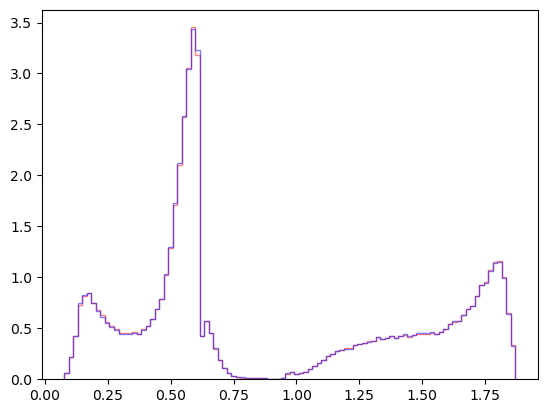

In [185]:
plt.hist(s23, weights=abs(amp2)**2, bins=100, alpha=0.5, label='amp', histtype='step', color='red', density=True)
plt.hist(s23, weights=abs(amp)**2, bins=100, alpha=0.5, label='amp', histtype='step', color='blue', density=True)

In [15]:
from tfpcbpggsz.core import DeltadeltaD, DeltadeltaD_old


/software/pc24403/tfpcbpggsz/tfpcbpggsz/core.py:1242: SyntaxWarning: invalid escape sequence '\e'
  """
/software/pc24403/tfpcbpggsz/tfpcbpggsz/generator/tensorflow_wrapper.py:57: UserWarning: arctan2 already exists.
  warnings.warn("{} already exists.".format(name))


In [18]:
phaseDiff = DeltadeltaD(amp, ampbar)

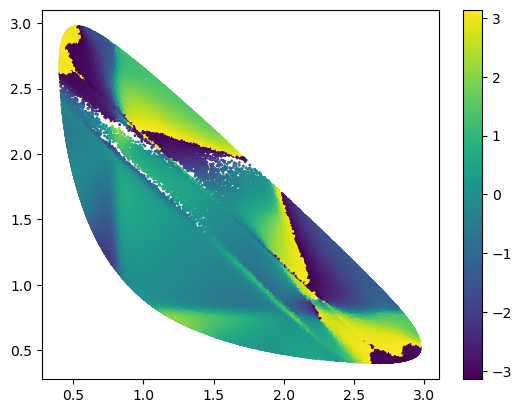

In [19]:
plt.scatter(s12, s13, c=phaseDiff, s=1)
plt.colorbar()

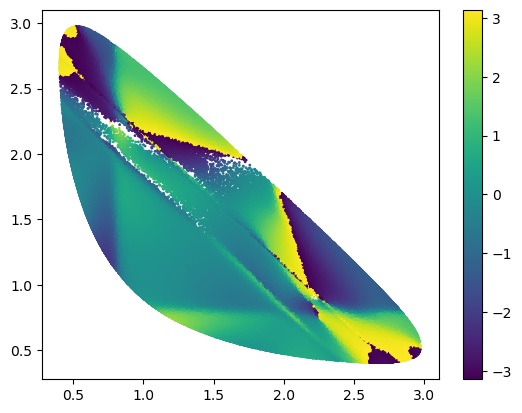

In [20]:
plt.scatter(s12, s13, c=DeltadeltaD_old(amp2, ampbar2), s=1)
plt.colorbar()

In [190]:
np.max(np.abs(amp2))

72.23907250501968

In [191]:
import uproot as up
import numpy as np

import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/outputs/toy/1x/'
f = up.open(int_path+'b2dk_DD_test_1.root:Bminus_DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names,'flav==-1')
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]], dtype=np.float32)
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]], dtype=np.float32)
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]], dtype=np.float32)

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))

In [192]:
s12 = get_mass(p1, p2)
s13 = get_mass(p1, p3)
s23 = get_mass(p2, p3)
amp = []
ampbar = []
for i in range(s12.shape[0]):
    amp.append(obj.AMP(p1[i].tolist(), p2[i].tolist(), p3[i].tolist()))
    ampbar.append(obj.AMP(p1bar[i].tolist(), p3bar[i].tolist(), p2bar[i].tolist())*-1)
amp = np.array(amp)
ampbar = np.array(ampbar)

TypeError: Argument 'k0' has incorrect type (expected list, got float)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.42032397, 0.44485754, 0.46939112, 0.4939247 , 0.51845827,
        0.54299185, 0.56752542, 0.592059  , 0.61659257, 0.64112615,
        0.66565973, 0.6901933 , 0.71472688, 0.73926045, 0.76379403,
        0.7883276 , 0.81286118, 0.83739476, 0.86192833, 0.88646191,
        0.91099548, 0.93552906, 0.96006263, 0.98459621, 1.00912979,
        1.03366336, 1.05819694, 1.08273051, 1.10726409, 1.13179767,
        1.15633124, 1.18086482, 1.20539839, 1.22993197, 1.25446554,
        1.27899912, 1.3035327 , 1.32806627, 1.35259985, 1.37713342,
        1.401667  , 1.42620057, 1.45073415, 1.47526773, 1.4998013 ,
        1.52433488, 1.54886845, 1.57340203, 1.59793561, 1.62246918,
        1.64700276, 1.67153633, 1.69606991, 1.72060348, 1.74513706,
   

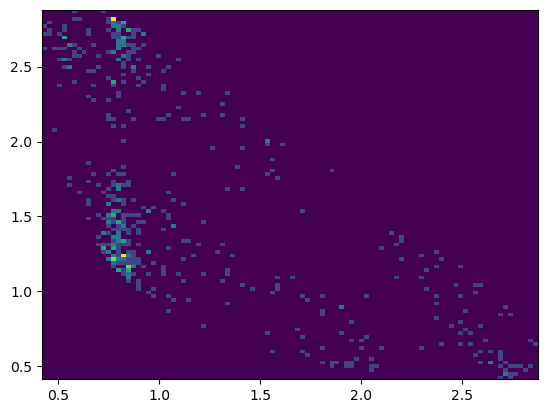

In [ ]:
plt.hist2d(s13, s12, bins=100)

In [ ]:
A_comb = (abs(amp)**2 + abs(ampbar)**2)*0.5*0.53+np.ones_like(abs(ampbar)**2)*0.47

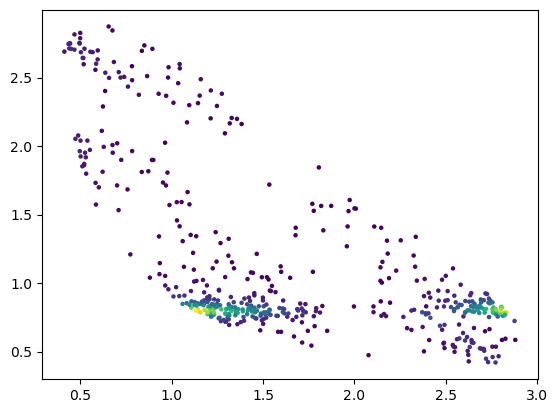

In [ ]:
plt.scatter(s12, s13, c=abs(ampbar)**2, cmap='viridis', s=5)

(array([ 3.,  3.,  8.,  7., 10., 10.,  3.,  8.,  5.,  9.,  9.,  9.,  7.,
         8.,  2.,  2.,  6.,  4.,  4.,  7.,  9.,  3.,  2.,  7.,  2., 10.,
         9.,  9., 13., 15., 14., 16., 17., 17., 16., 17., 12., 15., 11.,
        10.,  9., 10., 11., 11.,  3.,  8.,  7.,  4.,  7.,  7.,  0.,  4.,
         3.,  4.,  3.,  3.,  2.,  4.,  4.,  2.,  2.,  1.,  0.,  1.,  1.,
         2.,  3.,  3.,  3.,  1.,  5.,  6.,  1.,  1.,  4.,  3.,  4.,  6.,
         5.,  3.,  9.,  8., 11., 10.,  7., 13., 11., 16.,  9., 12., 11.,
        10., 16.,  9., 12.,  9.,  3.,  1.,  1.,  1.]),
 array([0.4172045 , 0.44235432, 0.46750414, 0.49265394, 0.51780379,
        0.54295361, 0.56810337, 0.5932532 , 0.61840302, 0.64355284,
        0.66870266, 0.69385248, 0.71900231, 0.74415213, 0.76930195,
        0.79445171, 0.81960154, 0.84475136, 0.86990118, 0.895051  ,
        0.92020082, 0.94535065, 0.97050047, 0.99565029, 1.02080011,
        1.04594994, 1.07109976, 1.09624958, 1.1213994 , 1.14654922,
        1.17169905, 1.1968

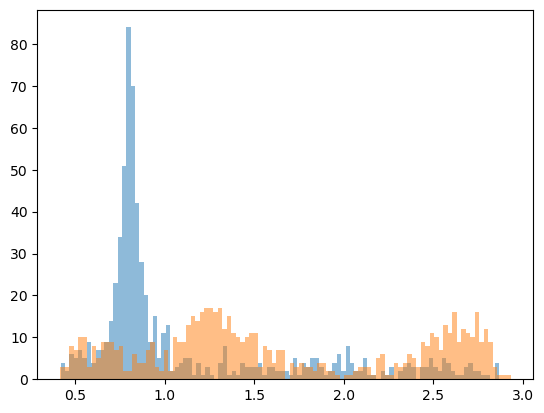

In [ ]:
plt.hist(s12, bins=100, alpha=0.5)
plt.hist(s13, bins=100, alpha=0.5)

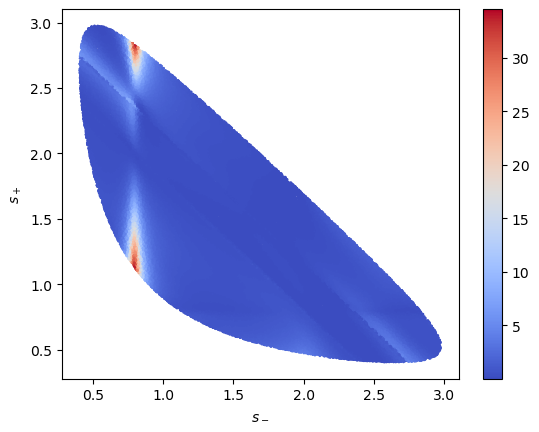

In [ ]:
plt.scatter(s12, s13, c=np.abs(amp)**2, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

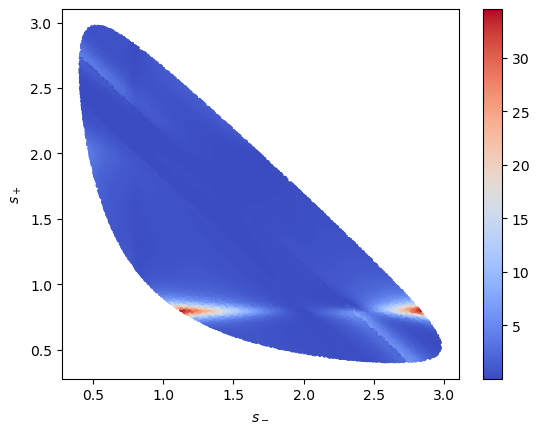

In [ ]:
plt.scatter(s12, s13, c=np.abs(ampbar)**2, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

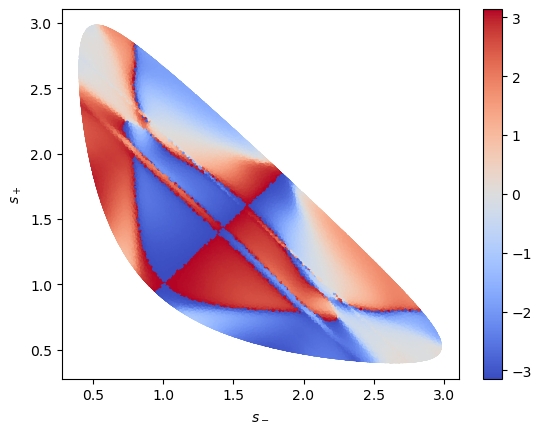

In [ ]:
plt.scatter(s12[:1000000], s13[:1000000], c=phaseDiff, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar() 

In [ ]:
# read from txt file with format 'A Abar DeltaD' in amplittude.txt
amp_ampgen = []
ampbar_ampgen = []
phaseDiff_ampgen = []
with open('/shared/scratch/pc24403/cpfit_sig_noeff/sub/amplitudes.txt', 'r') as f:
    for line in f:
        amp_ampgen.append(float(line.split()[0]))
        ampbar_ampgen.append(float(line.split()[1]))
        phaseDiff_ampgen.append(float(line.split()[2]))
        if len(amp_ampgen) == 10000000:
            break


In [ ]:
int_path='/shared/scratch/pc24403/cpfit_sig_noeff/sub/'
f = up.open(int_path+'tuple.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]])
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]])
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]])

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



(array([ 3796.59696899,  6515.59549359,  9672.51958599, 12615.85624218,
        13844.6486926 , 13404.2593223 , 13481.72656112, 13029.63714139,
        12425.93585751, 11943.26060552, 11204.40383312, 10675.40454253,
        10035.08858656,  8934.25021569,  6956.21812507,  5620.40733818,
         5920.69287477,  6679.51883684,  7258.24356111,  7910.89922559,
         8247.81394965,  8808.02282872,  9751.57590711, 10262.9294084 ,
        11973.56147681, 13425.87071857, 15866.34760481, 20014.53549127,
        23492.9793069 , 26604.24261893, 27826.74589824, 28602.32712471,
        27568.14184902, 27143.13318583, 25055.79799357, 24631.05133233,
        23486.5954092 , 21536.70589056, 20413.97947282, 19148.55857286,
        17253.82445927, 16943.22322875, 15299.91121153, 14152.74295818,
        13234.59321278, 11530.45110424, 10340.76558926,  9802.49977837,
         8613.92928021,  8120.84549988,  6986.62853966,  6288.5778403 ,
         5812.08727881,  5147.55410618,  4736.97031448,  4274.28

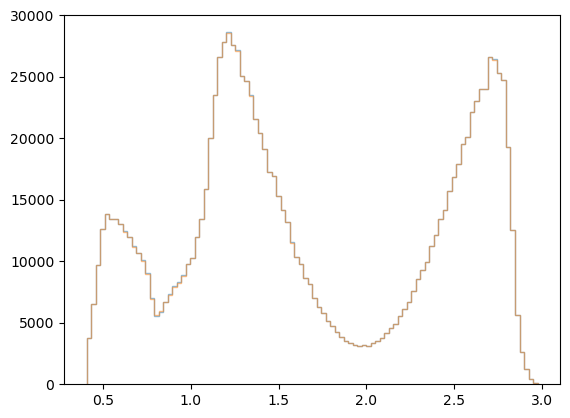

In [ ]:
plt.hist(s13[:1000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(amp_ampgen)**2).tolist(), histtype='step')
plt.hist(s13[:1000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(ampbar)**2).tolist(), histtype='step')


In [ ]:
print(amp[0])
print(ampbar[0])

(0.9225096009985854-0.30486784291871416j)
(-0.010822391005179212+0.5784163386136099j)


In [ ]:
s12_ampgen, s13_ampgen = get_mass(p1[:100000], p2[:100000]), get_mass(p1[:100000], p3[:100000])

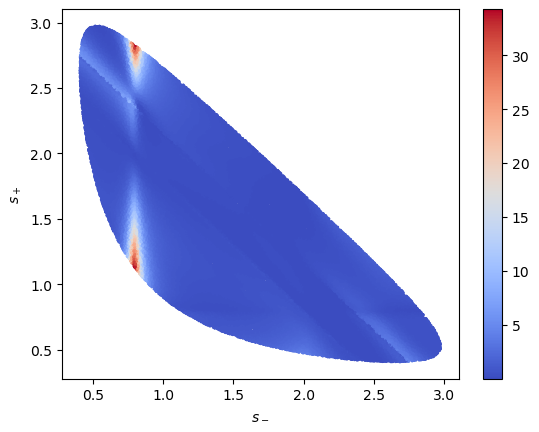

In [ ]:
plt.scatter(s12_ampgen, s13_ampgen, c=np.abs(amp[:100000])**2 cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

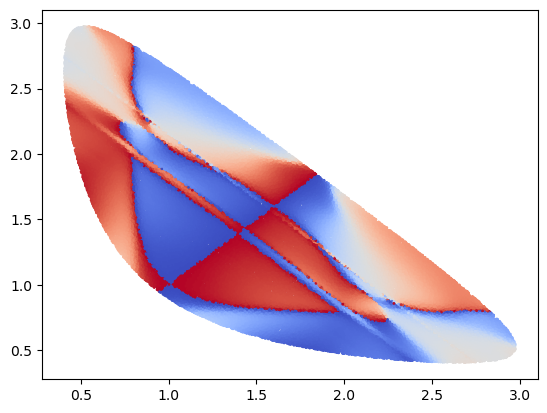

In [ ]:
plt.scatter(s12_ampgen, s13_ampgen, c=phaseDiff[:100000], cmap='coolwarm', s=1)

In [ ]:
print(np.mean(np.abs(amp_ampgen)**2))
print(np.mean(np.abs(ampbar_ampgen)**2))
AAbar = np.array(amp_ampgen)*np.array(ampbar_ampgen)
real_part = np.mean(AAbar*np.cos(phaseDiff_ampgen))
imag_part = np.mean(AAbar*np.sin(phaseDiff_ampgen))
print(real_part)
print(imag_part)

1.228950376197287
1.228878237473732
-0.10715756093365955
0.00026020039035674783
